# Linear Models (Regularization)

> Multiple Linear Regression (OLS), Lasso Regression, Ridge Regression, Elastic Net Model, SGD Regressor and Regularization


- toc: true 
- badges: true
- comments: true
- categories: [OLS, Multiple Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Model, SGD Regressor, regularization]
- image: images/regularized_linear_models.png

 ## 1) Aknowledge the sources used for this tutorial

The dataset source for this tutorial: https://www.kaggle.com/code/deepakdodi/lasso-and-ridge-hypertuning-over-gapminder-dataset/data

**This dataset considers different features (i.e population, fertility, HIV, CO2,  child mortality & Female/Male BMI ) to predict life expectancy.**

## 2) Import libraries 

### 2.1) Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import simplefilter
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RepeatedKFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, SGDRegressor

# Ignore the convergence warning when using the SGDRegressor (Internet research suggests ignoring this warning is not an issue for this algorithm)
simplefilter("ignore", category=ConvergenceWarning)

## 3) Create dataset for the analysis

- We will create a dataset to exemplify the use of regularization. We will do so by using enriching a real dataset with polynomial features.
- We seek to simulate real-life datasets that often contain correlated features, which might lead multiple regression models to overfit. 
- Regularization can help deal with the overfitting issue by performing feature selection which reduces variance but introduces bias. 

### 3.1) Import dataset and incorporate polynomial features

In [ ]:
# Step 1: Import dataset
data = pd.read_csv('https://raw.githubusercontent.com/leonardodecastro/data/main/gapminder.csv').drop('Region', axis=1)

# Step 2: Split into dependent and independent features
X = data.drop(['life'], axis = 1)
y = data['life'].to_list()

# Step 3: Get the names of the independent variables for later use
column_names_list = X.columns.tolist()

# Step 4: Add polynomial features
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X = poly.fit_transform(X)

# Step 5: Create a new dataframe with the polynomial features
new_names_columns_list = column_names_list + ['Poli.' + str(i) for i in range(1, X.shape[1]- len(column_names_list) + 1)]
data_2 = pd.DataFrame(X, columns= new_names_columns_list)

# Step 6: Add dependent variables to the new dataframe
data_2['life'] = y

### 3.2) Split the datasets

In [ ]:
train, test = train_test_split(data_2, test_size=0.2, random_state = 8)

### 3.3) Scale the datasets

In [ ]:
# Step 1: Create a variable for the scaler
scaler = StandardScaler()

# Step 2: Apply fit_transform on the training set and apply the transformation to the test set
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Step 3: Split dependent and independent variables
X_train  = train_scaled[ : , : -1]
y_train = train_scaled[ : , -1:]

X_test = test_scaled[ : , : -1]
y_test = test_scaled[ : , -1:]

## 4) Run Different Linear Models

### 4.1) Train the Linear Regression Model

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

### 4.2) Tune the Lasso Regression Model

In [12]:
# Create a cross-validation object
cv=RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)

# Run gridsearch with crossvalidation for lasso regression
model_2 = LassoCV(alphas=np.logspace(-8, 8, 100), cv=cv, fit_intercept = False, tol=0.1)
model_2.fit(X_train, y_train.ravel())

# Extract the optimal value of alpha
optimal_alpha_lasso = model_2.alpha_
print('The optimal alpha value:',round(optimal_alpha_lasso,3))

The optimal alpha value: 0.029


### 4.3) Tune the Ridge Regression Model

In [13]:
# Create a cross-validation object
cv=RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)

# Run gridsearch with crossvalidation for lasso regression
model_3 = RidgeCV(alphas=np.logspace(-8, 8, 100), cv=cv, fit_intercept = False)
model_3.fit(X_train, y_train.ravel())

# Extract the optimal value of alpha
optimal_alpha_ridge = model_3.alpha_
print('The optimal alpha value:', round(optimal_alpha_ridge,3))

The optimal alpha value: 72.208


### 4.4) Tune the Elastic Net Model

In [ ]:
# Create a cross-validation object
cv=RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)

# Run gridsearch with crossvalidation for lasso regression
model_4 = ElasticNetCV(max_iter=100000, l1_ratio=np.logspace(-8, 8, 100),alphas=np.logspace(-8, 8, 100), cv=cv, fit_intercept = False, tol=0.1)
model_4.fit(X_train, y_train.ravel())

# Extract the optimal value of alpha and l1 ratio
l1_ratio = model_4.l1_ratio_
alpha = model_4.alpha_
print('The optimal l1_ratio value:', round(l1_ratio,3), '\n')
print('The optimal alpha value:', round(alpha,3))

The optimal l1_ratio value: 0.129 

The optimal alpha value: 0.187


### 4.5) Tune the SGD Regressor

Let's tune the Stochastic Gradient Descent Regressor. This model is often useful for very large datasets. 

In [ ]:
# Create a cross-validation object
cv=RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)

# Grid search - this will take about 1 minute.
param_grid = { 'alpha': np.logspace(-8, 8, 100), 'loss': ['squared_error', 'huber', 'epsilon_insensitive'], 'tol': [0.1],
              'penalty': ['l2', 'l1', 'elasticnet'], 'learning_rate': ['constant', 'optimal', 'invscaling'], 'random_state': [42]}

# Run gridsearch with crossvalidation for lasso regression
model_5 = GridSearchCV(SGDRegressor(), param_grid, cv = cv, verbose = 0)
model_5.fit(X_train, y_train.ravel())
print('Optimal Hyperparameters: ',model_5.best_params_)

Optimal Hyperparameters:  {'alpha': 0.004534878508128591, 'learning_rate': 'constant', 'loss': 'huber', 'penalty': 'l1', 'random_state': 42, 'tol': 0.1}


## 5) Compare model metrics

### 5.1) Create a dataframe with model metrics

In [ ]:
# Step 1: Create lists and dictionaries for later use
metrics_dict = {}
model_names_list = ['OLS','LASSO','RIDGE','ElasticNet','SGD']
model_list = [model_1, model_2, model_3, model_4, model_5]

# Step 2: Extract model metrics for each model
for i in range(0,len(model_list)):

  # Select the trained model
  model = model_list[i]

  # Determine the number of coefficients that were not zero
  if model != model_5:
    number_of_non_zero_coef = len( abs(model.coef_) [ abs(model.coef_) > 0 ])
  else:
    number_of_non_zero_coef = len( abs(model.best_estimator_.coef_) [ abs(model.best_estimator_.coef_) > 0 ])

  # Store metrics and the number of coefficients that were not zero in a dictionary
  metrics_dict[model_names_list[i]] = {'train_r_squared': r2_score(y_train, model.predict(X_train)),
                                       'test_r_squared': r2_score(y_test, model.predict(X_test)),
                                       'train_mse': mean_squared_error(y_train, model.predict(X_train)), 
                                       'test_mse': mean_squared_error(y_test, model.predict(X_test)),
                                       'number_of_non_zero_coef': number_of_non_zero_coef}

# Step 3: Create a dataframe with model metrics
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index').rename_axis('Model').reset_index()
metrics_df.round(3)

,Model,train_r_squared,test_r_squared,train_mse,test_mse,number_of_non_zero_coef
0,OLS,0.937,0.711,0.063,0.411,37
1,LASSO,0.880,0.848,0.120,0.216,15
2,RIDGE,0.888,0.889,0.112,0.159,36
3,ElasticNet,0.892,0.887,0.108,0.162,18
4,SGD,0.880,0.894,0.120,0.150,27


### 5.2) Visualize model metrics results

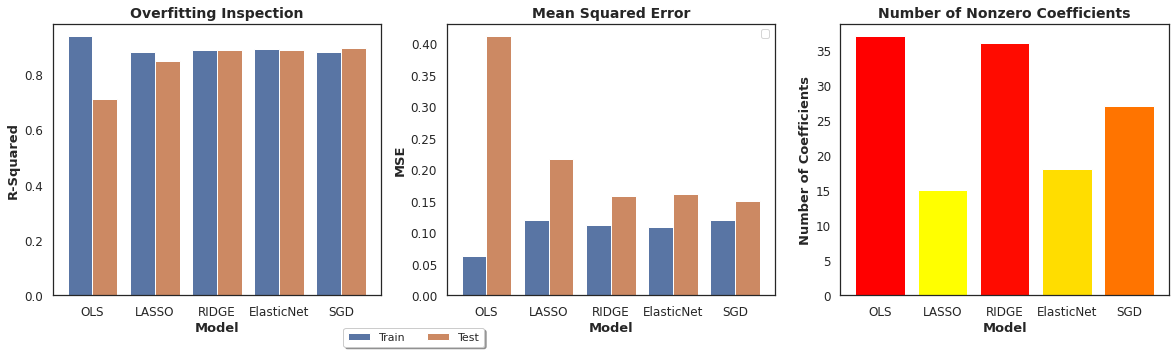

In [ ]:
# Step 1: Create a smaller dataframe with model metrics
r_squared_df = pd.melt(metrics_df[['Model','train_r_squared', 'test_r_squared']], id_vars=['Model'], var_name='Dataset', value_name='R-Squared')
r_squared_df['Dataset'] = r_squared_df['Dataset'].map({'train_r_squared': 'Train', 'test_r_squared': 'Test'})

# Step 2: Create a dataframe with nonzero coefficients
mse_df = pd.melt(metrics_df[['Model','train_mse', 'test_mse']], id_vars=['Model'], var_name='Dataset', value_name='MSE')
mse_df['Dataset'] = mse_df['Dataset'].map({'train_mse': 'Train', 'test_mse': 'Test'})

# Step 3: Create a dataframe with nonzero coefficients
coef_df = metrics_df[['Model','number_of_non_zero_coef']]

# Step 4: Set seaborn plotting aesthetics
sns.set(style='white')
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))

# Step 5: Create visualization 1
sns.barplot(x='Model', y='R-Squared', hue='Dataset', data = r_squared_df, ax= axes[0]).set_title('Overfitting Inspection', size = 14, weight='bold')
axes[0].legend(loc='upper center', bbox_to_anchor=(1.1, -0.1),fancybox=True, shadow=True, ncol=5)
axes[0].set_xlabel('Model', weight='bold', fontsize = 13)
axes[0].set_ylabel('R-Squared', weight='bold', fontsize = 13)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Step 6: Create visualization 2
sns.barplot(x='Model', y='MSE', hue='Dataset', data = mse_df, ax= axes[1]).set_title('Mean Squared Error', size = 14, weight='bold')
axes[1].legend('')
axes[1].set_xlabel('Model', weight='bold', fontsize = 13)
axes[1].set_ylabel('MSE', weight='bold', fontsize = 13)
axes[1].tick_params(axis='both', which='major', labelsize=12)

# Step 7: Create visualization 3
norm = plt.Normalize(coef_df['number_of_non_zero_coef'].min(), coef_df['number_of_non_zero_coef'].max())
cmap = plt.get_cmap("autumn_r")

axes[2].bar(x="Model", height="number_of_non_zero_coef", data=coef_df, color=cmap(norm(coef_df['number_of_non_zero_coef'].values)))
axes[2].tick_params(axis='both', which='major', labelsize=12)
axes[2].set_title('Number of Nonzero Coefficients', fontweight = 'bold',fontsize = 14)
axes[2].set_xlabel('Model', weight='bold', fontsize = 13)
axes[2].set_ylabel('Number of Coefficients', weight='bold', fontsize = 13)

plt.show()

**Comparison of the algorithms (overview):**

- The first chart shows that the OLS model overfits while all regularized model present very little overfitting.
- The second chart shoes that regularized models present lower mean squared error values than the OLS regression. 
- The third chart shows that the Lasso Regression is the choice that uses fewer variables for prediction (15 out of 37). 

> The best model considering this tutorial would be the Elastic Net Model since if provides high performance and also leads to a stark reduction in the number of variables, which helps improve model explainability. 

> The results in of the OLS model could improve for different random_state values used for splitting the data. Sometimes, other split values lead to very high performances by the OLS model. This fact does not disprove the main point of this tutorial regarding regularization. After all, regardless of the random_state, `regularized models tend to present robust perfomance metrics.` 

## 6) Read more about regularization techniques

The following sources provide a great overview of the algorithms discussed in this tutorial: <br> <br>
- https://www.kaggle.com/code/maxitype/2-linear-lasso-ridge-sgd-poly-beginner
- https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d
- https://medium.com/analytics-vidhya/lasso-regression-fundamentals-and-modeling-in-python-ad8251a636cd
- https://towardsdatascience.com/from-linear-regression-to-ridge-regression-the-lasso-and-the-elastic-net-4eaecaf5f7e6
- https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29
